###  EDA SALES ANALYSIS

Importing the important Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\ACER\Downloads\Diwali Sales Data.csv",encoding = 'unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.duplicated().sum()

8

Dropping the Status and unnamed1 column

In [7]:
df.drop(["Status","unnamed1"],inplace = True,axis = 1)

In [8]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [11]:
df["Amount"]= df["Amount"].astype("int")

In [12]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Exploratory Data Analysis

#### GENDER

In [14]:
df["Gender"].value_counts()

Gender
F    7832
M    3407
Name: count, dtype: int64

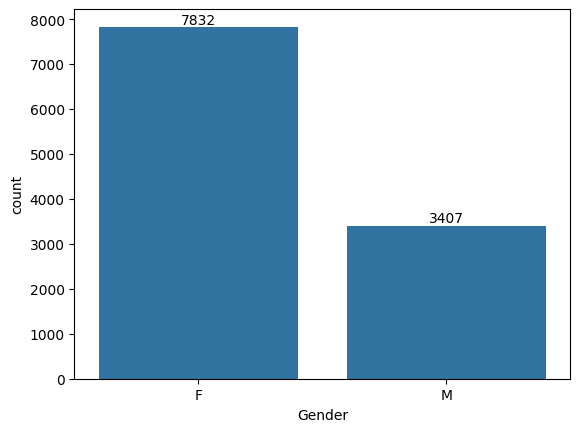

In [16]:
ax = sns.countplot(x="Gender",data = df)
for bars in ax.containers:
    ax.bar_label(bars)

No of Female is 7832 and Male is 3407

In [28]:
sum_of_amount = df.groupby('Gender')["Amount"].sum().reset_index()

In [30]:
sum_of_amount

,Gender,Amount
0,F,74335853
1,M,31913276


Female are Spending More on Shopping as compared to Male

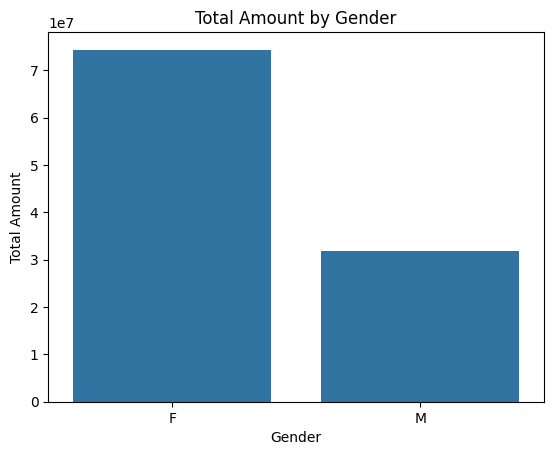

In [29]:
sns.barplot(x='Gender', y='Amount', data=sum_of_amount,)

# Adding title and labels
plt.title('Total Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')

# Display the plot
plt.show()

In [31]:
df.groupby("Gender")["Age"].mean()

Gender
F    35.324311
M    35.608160
Name: Age, dtype: float64

The Avg age of Male and Female is approx same 35 who are doing shopping

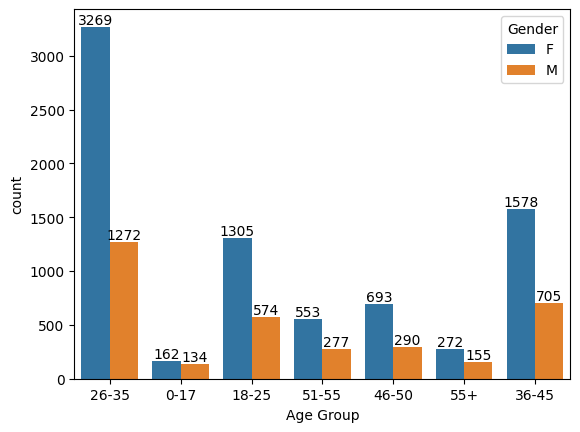

In [33]:
ax = sns.countplot(data = df,x="Age Group",hue = "Gender")
for bars in ax.containers:
    ax.bar_label(bars)

age group of 26-35 are doing more shopping annd more than double of men, women are doing shopping 3269

In [34]:
## Total amount vs age group

In [35]:
sales_age = df.groupby("Age Group")["Amount"].sum().reset_index()

<Axes: xlabel='Age Group', ylabel='Amount'>

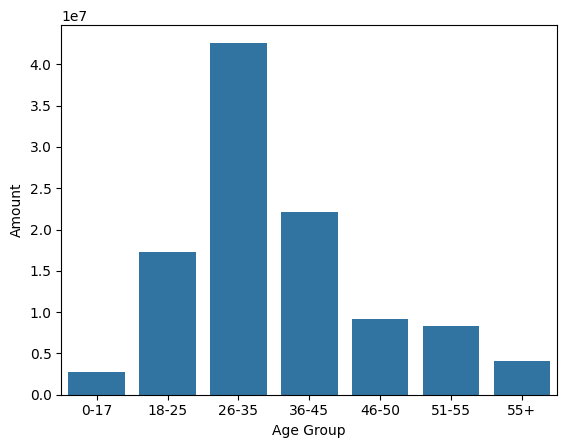

In [36]:
sns.barplot(x = "Age Group",y = "Amount",data = sales_age)

In [37]:
### state

In [38]:
df["State"].value_counts()

State
Uttar Pradesh       1944
Maharashtra         1525
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              427
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: count, dtype: int64

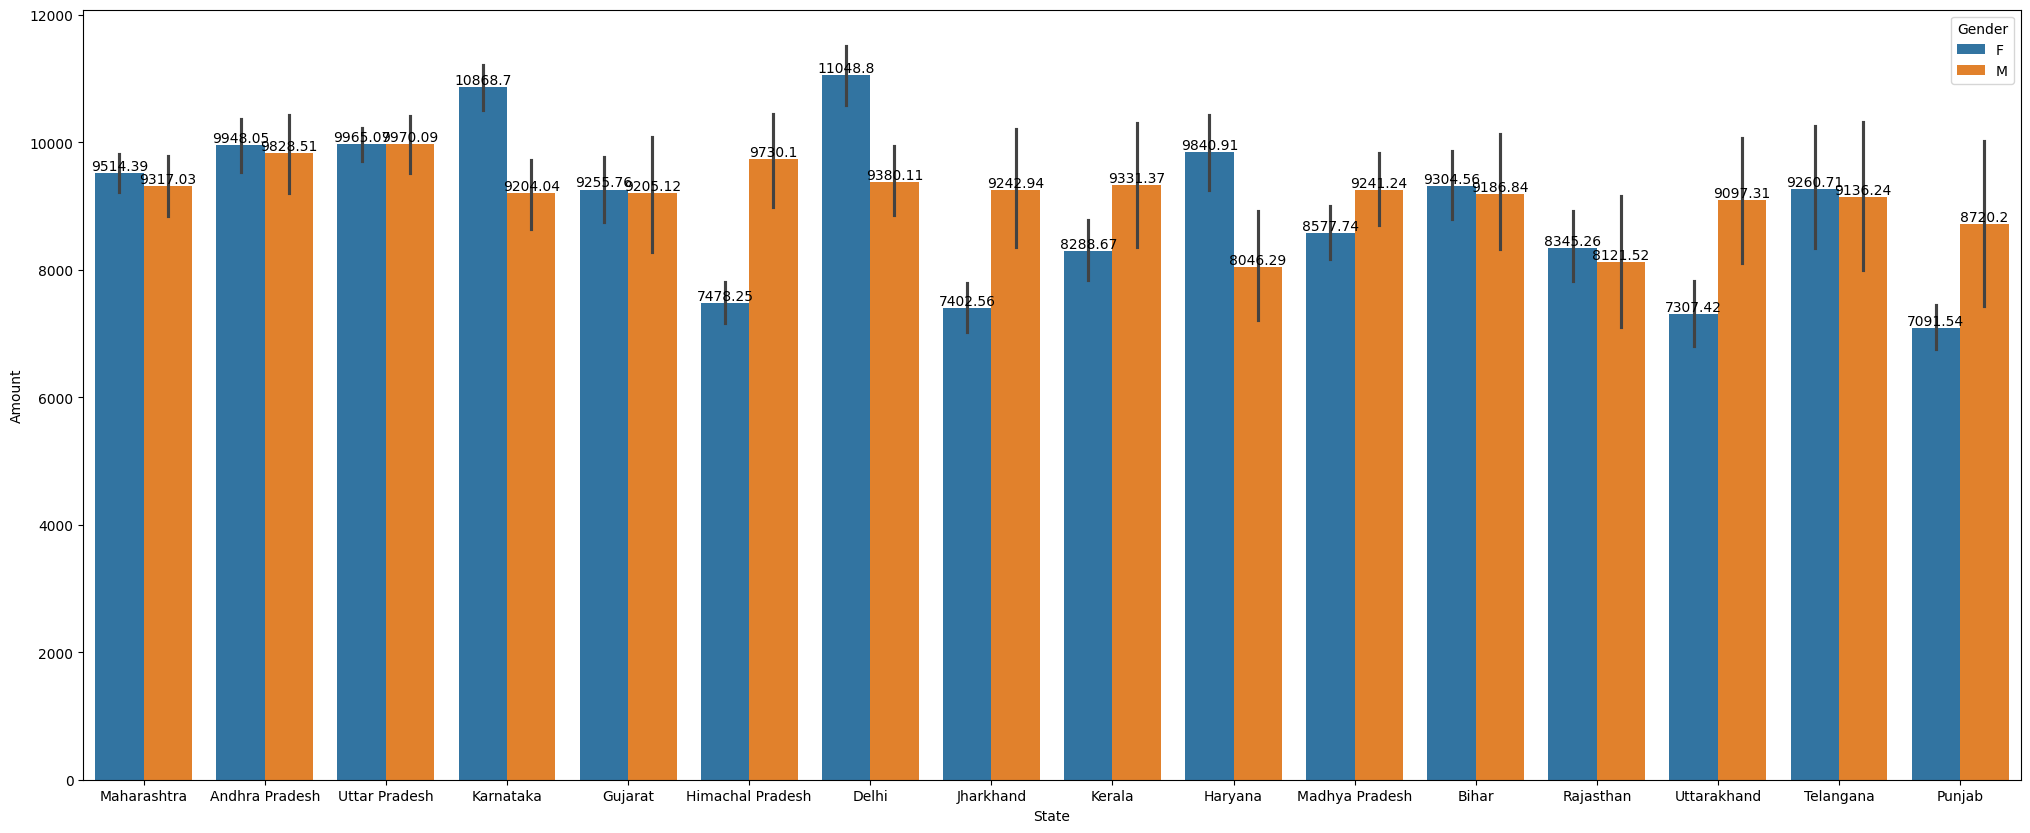

In [67]:
plt.figure(figsize=(25,10))
ax = sns.barplot(x="State",y ="Amount",hue ="Gender",data = df)
for bars in ax.containers:
    ax.bar_label(bars)


comparing Gender wise in Delhi Female is doing More shopping

In [72]:
ax = df.groupby("State")['Amount'].sum().sort_values(ascending = False).head(10).reset_index()

<Axes: xlabel='State', ylabel='Amount'>

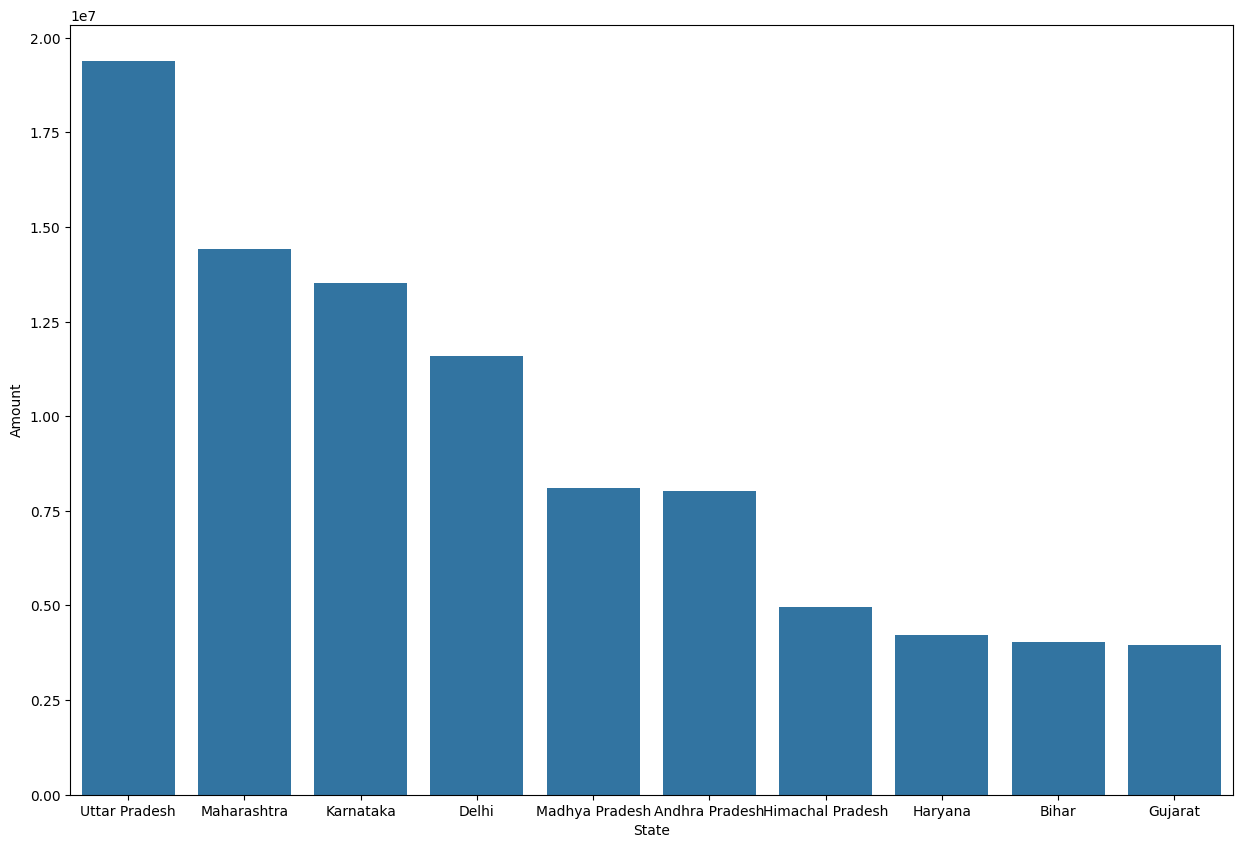

In [74]:
plt.figure(figsize = (15,10))
sns.barplot(x = "State",y = "Amount",data = ax)

from Uttar pradesh their expentature in shopping 

In [51]:
df.groupby("State")["Orders"].sum()

State
Andhra Pradesh      2051
Bihar               1062
Delhi               2740
Gujarat             1066
Haryana             1109
Himachal Pradesh    1568
Jharkhand            953
Karnataka           3240
Kerala              1137
Madhya Pradesh      2252
Maharashtra         3810
Punjab               495
Rajasthan            555
Telangana            312
Uttar Pradesh       4807
Uttarakhand          824
Name: Orders, dtype: int64

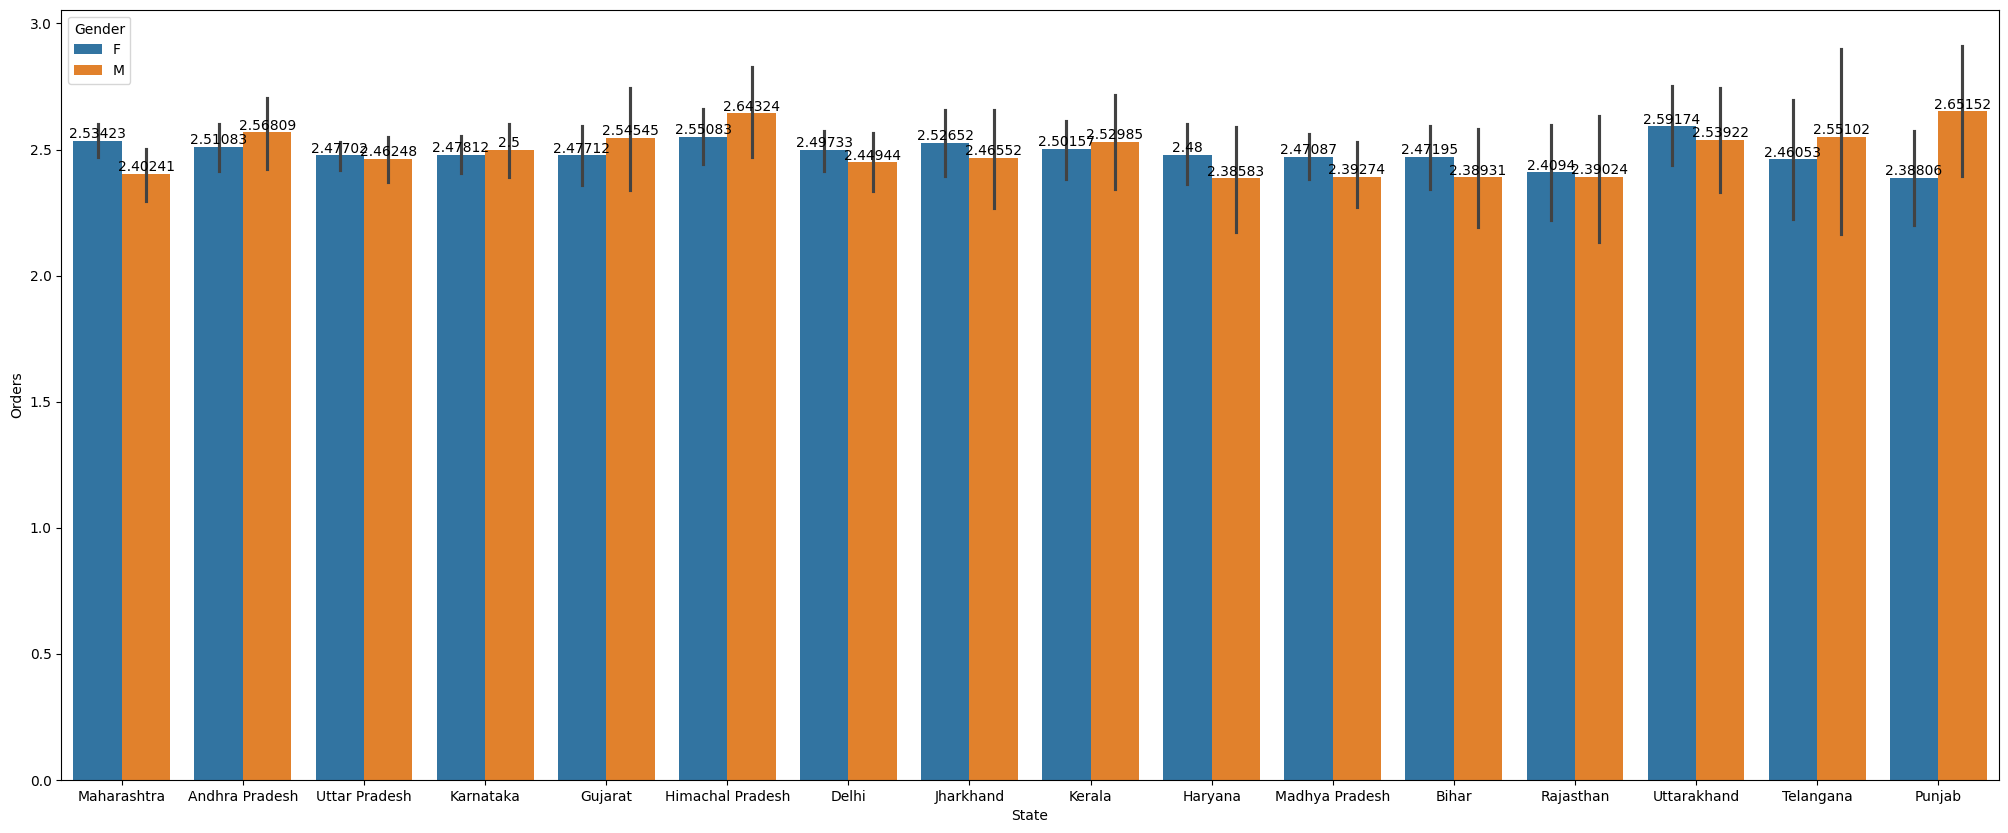

In [52]:
plt.figure(figsize=(25,10))
ax = sns.barplot(x="State",y ="Orders",hue ="Gender",data = df)
for bars in ax.containers:
    ax.bar_label(bars)

In punjab more no of femals is ordering

<Axes: xlabel='State', ylabel='Orders'>

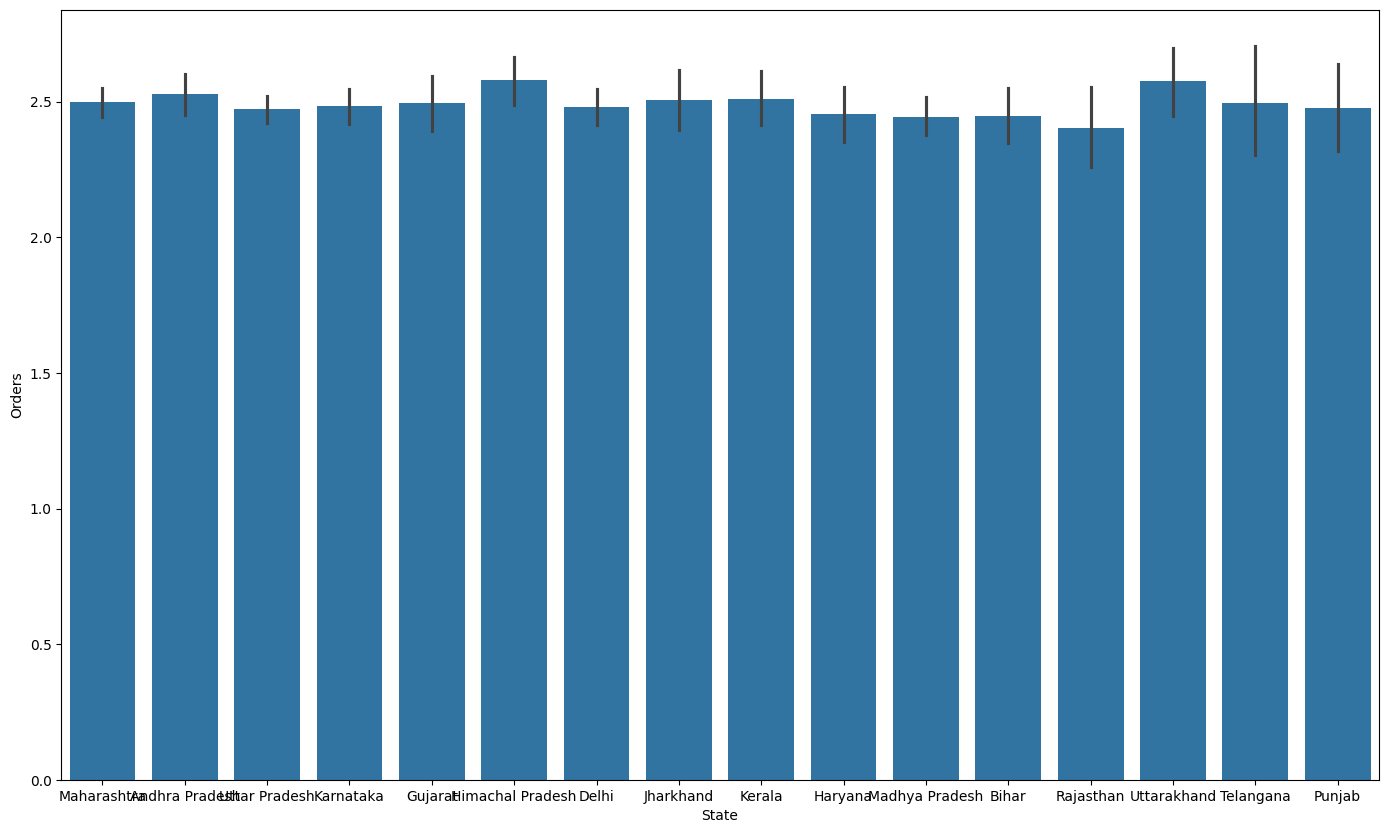

In [56]:
plt.figure(figsize=(17,10))
sns.barplot(x = "State",y = "Orders",data = df)

In [63]:
sales_state = df.groupby("State")["Orders"].sum().sort_values(ascending = False).head(10).reset_index()

<Axes: xlabel='State', ylabel='Orders'>

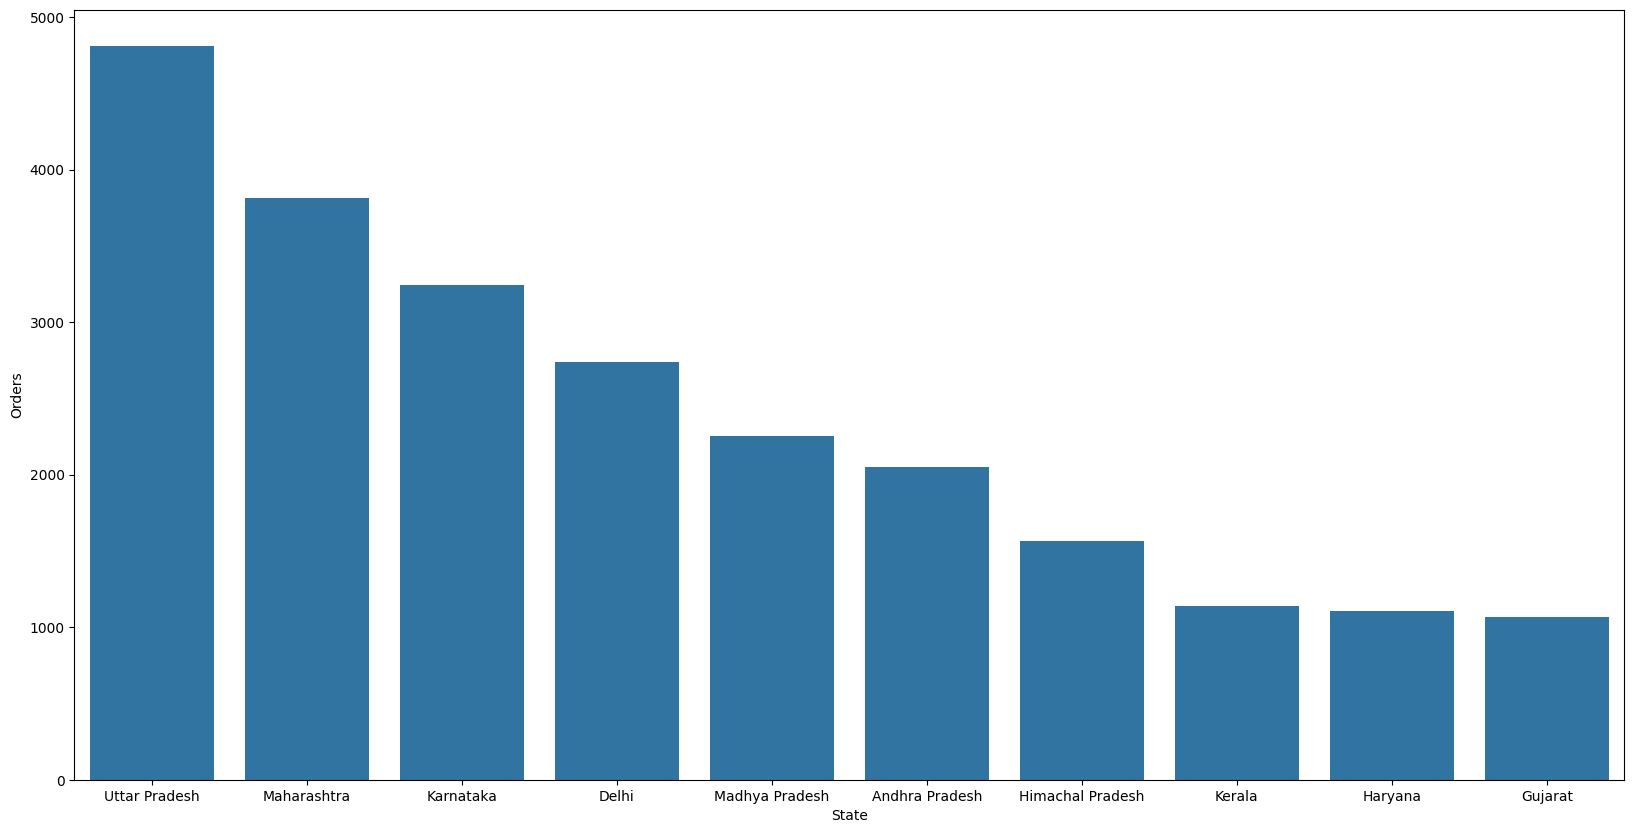

In [65]:
plt.figure(figsize = (20,10))
sns.barplot(data = sales_state,x = "State",y ="Orders")

max orders is placed from Uttar Pradesh

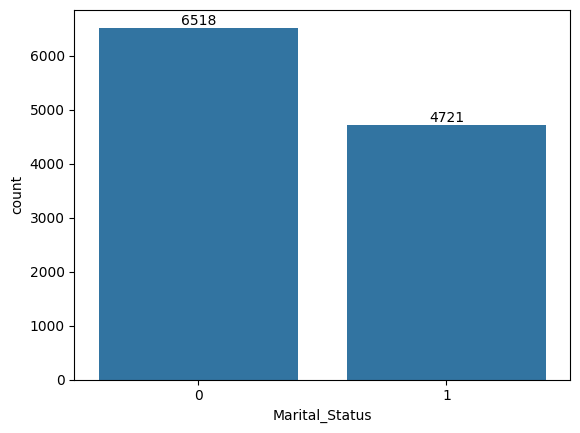

In [76]:
ax = sns.countplot(data = df,x = "Marital_Status")
for bars in ax.containers:
    ax.bar_label(bars)

Married people are doing more shopping as compared to un married

<Axes: xlabel='Marital_Status', ylabel='Amount'>

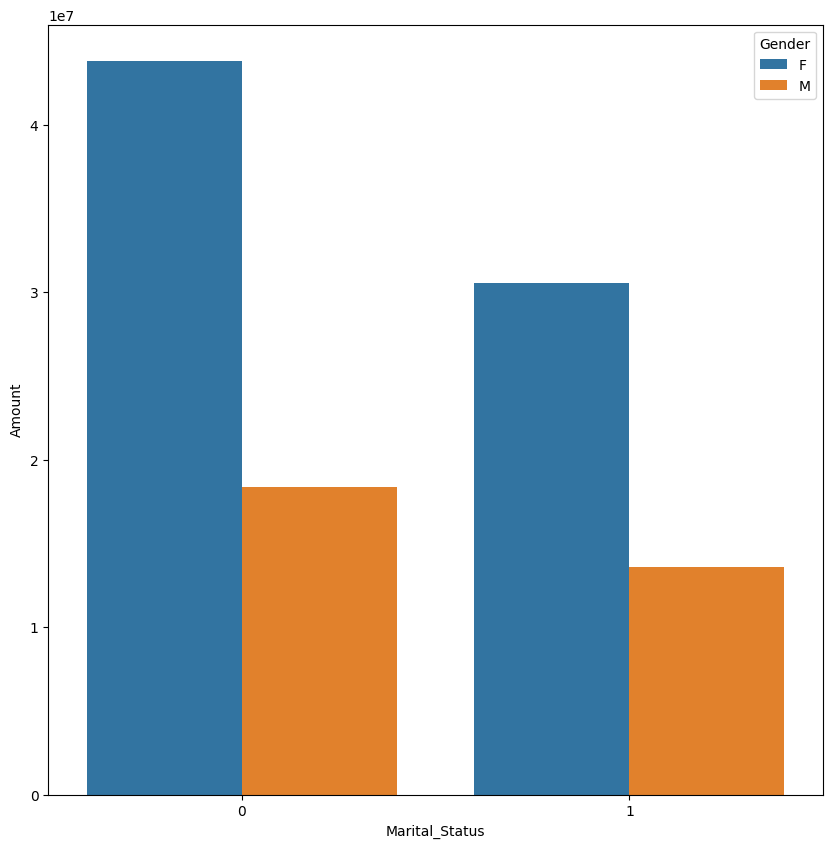

In [77]:
sales_state = df.groupby(["Marital_Status","Gender"],as_index = False)['Amount'].sum().sort_values(by ='Amount',ascending = False)
plt.figure(figsize =(10,10))
sns.barplot(data = sales_state,x = "Marital_Status" ,y = "Amount",hue = "Gender")

where as more married women is doing more shopping

In [81]:
df["Occupation"].value_counts()

Occupation
IT Sector          1583
Healthcare         1408
Aviation           1310
Banking            1137
Govt                854
Hospitality         703
Media               637
Automobile          565
Chemical            541
Lawyer              531
Retail              501
Food Processing     423
Construction        414
Textile             349
Agriculture         283
Name: count, dtype: int64

In [94]:
occ_amo =df.groupby("Occupation")['Amount'].sum().sort_values(ascending = False).reset_index()

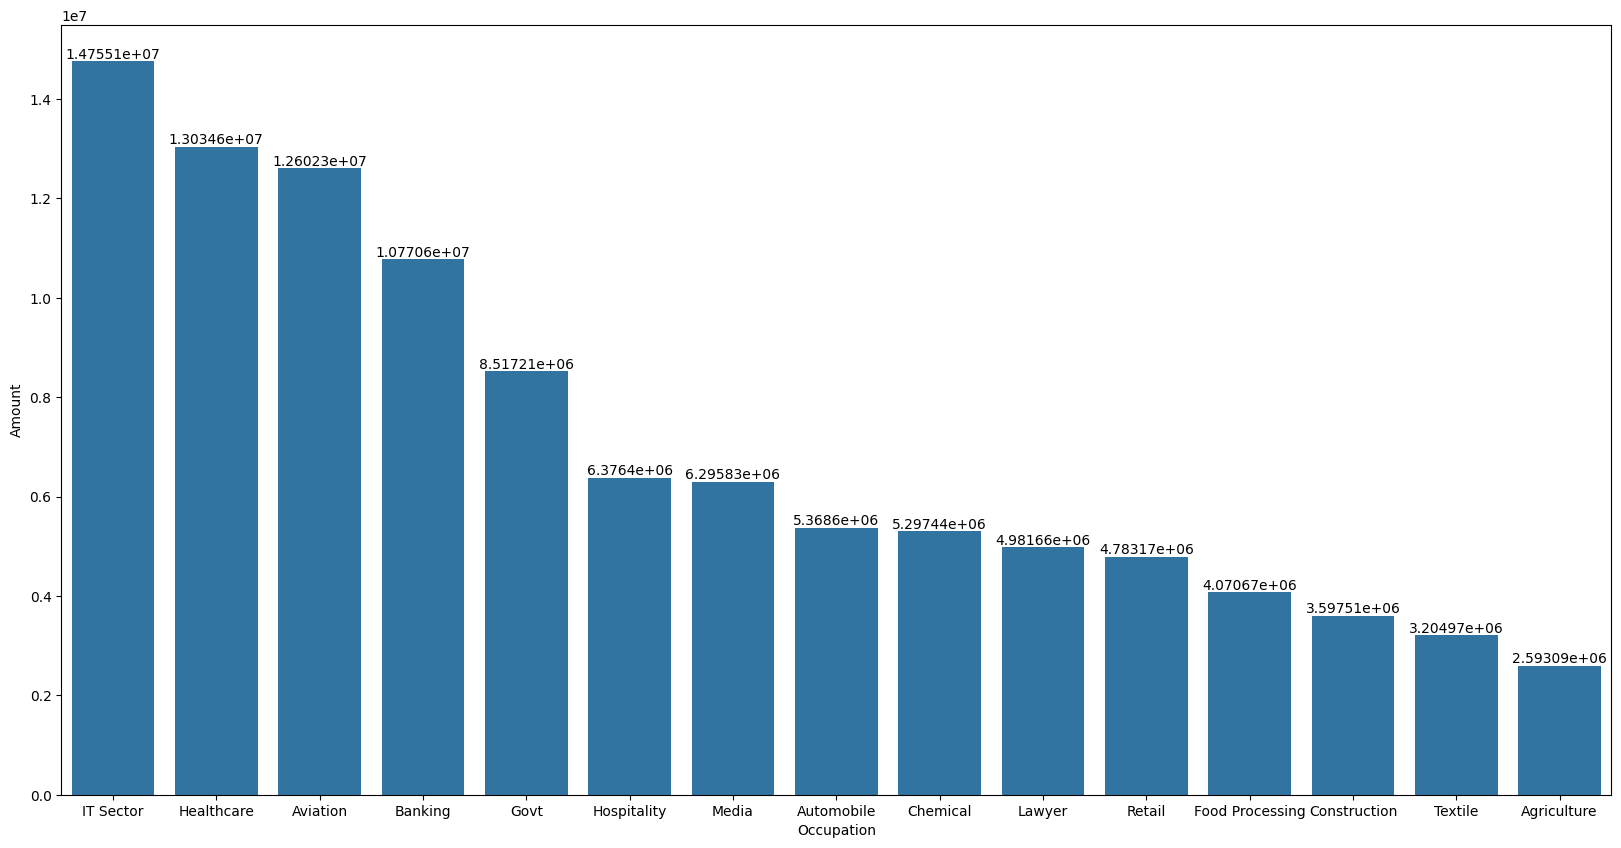

In [96]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data = occ_amo,x = "Occupation",y = "Amount")
for bars in ax.containers:
    ax.bar_label(bars)
    

In [97]:
occ_oo = df.groupby("Occupation")['Orders'].sum().sort_values(ascending = False).reset_index()

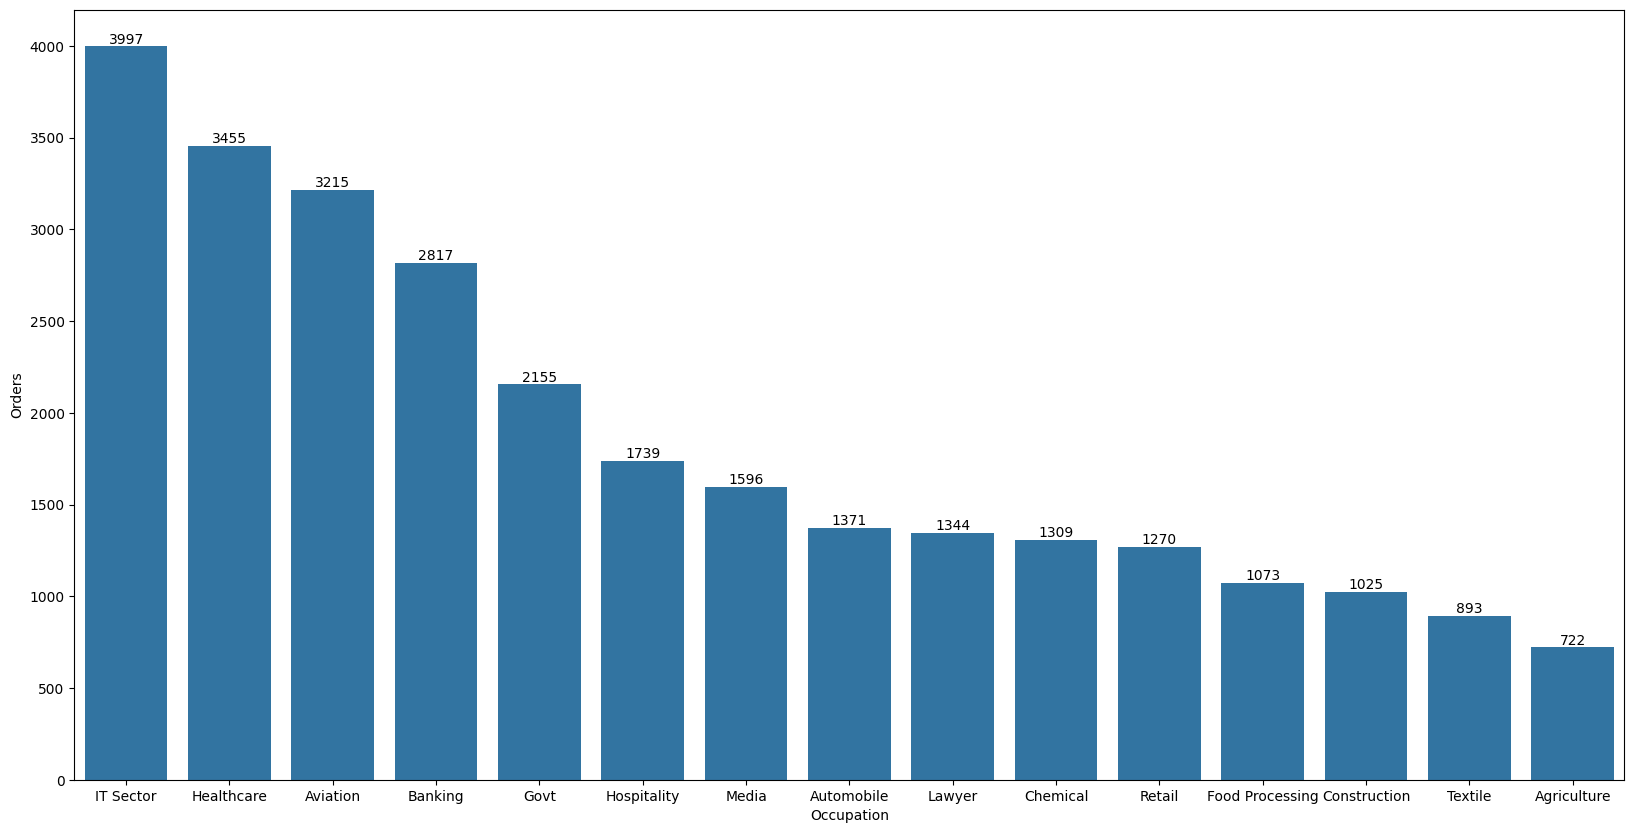

In [98]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data = occ_oo,x = "Occupation",y = "Orders")
for bars in ax.containers:
    ax.bar_label(bars)

People working in the IT sector tend to spend more on shopping, both in terms of frequency and amount.

In [99]:
df["Product_Category"].value_counts()

Product_Category
Clothing & Apparel       2655
Food                     2490
Electronics & Gadgets    2087
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       97
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64

clothing and apparel is more 2655 as compare to food 2490

In [113]:
ax = df.groupby("Product_Category")["Amount"].sum().sort_values(ascending = False).reset_index()
ax

,Product_Category,Amount
0,Food,33933883
1,Clothing & Apparel,16495019
2,Electronics & Gadgets,15643846
3,Footwear & Shoes,15575209
4,Furniture,5440051
5,Games & Toys,4331694
6,Sports Products,3635933
7,Beauty,1959484
8,Auto,1958609
9,Stationery,1676051


In [130]:
grouped = df.groupby(['Product_Category', 'Gender'])['Amount'].sum().reset_index().sort_values(by ="Amount",ascending = False).head(10)

In [131]:
grouped

,Product_Category,Gender,Amount
12,Food,F,24176102
14,Footwear & Shoes,F,11534547
6,Clothing & Apparel,F,11479103
10,Electronics & Gadgets,F,11033097
13,Food,M,9757781
7,Clothing & Apparel,M,5015916
11,Electronics & Gadgets,M,4610749
15,Footwear & Shoes,M,4040662
16,Furniture,F,3394642
18,Games & Toys,F,3045258


Female are spending more on food after that footwear and shoes later clothing

<Axes: xlabel='Product_Category', ylabel='Amount'>

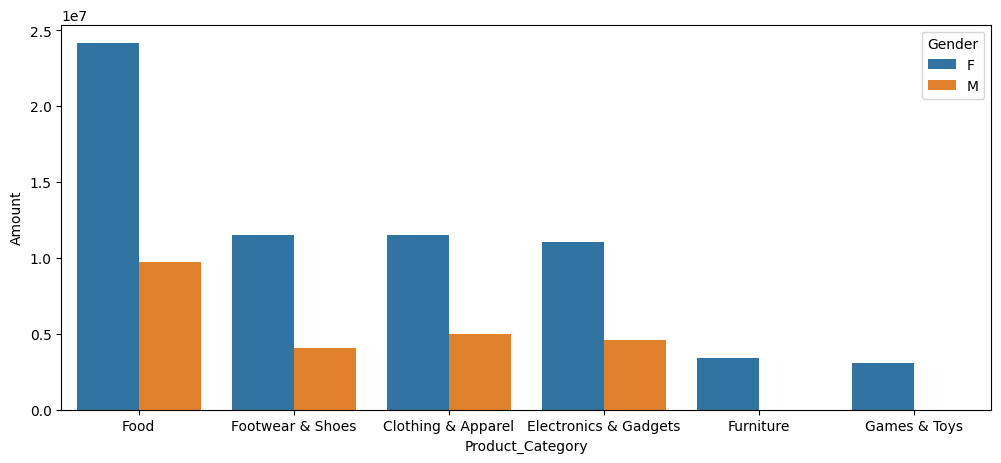

In [135]:
plt.figure(figsize=(12,5))
sns.barplot(data = grouped, x = "Product_Category", y = "Amount",hue = "Gender")

In [136]:
group = df.groupby(['Product_Category', 'Gender'])['Orders'].sum().reset_index().sort_values(by ="Orders",ascending = False).head(10)

In [137]:
group

,Product_Category,Gender,Orders
6,Clothing & Apparel,F,4648
12,Food,F,4406
10,Electronics & Gadgets,F,3682
7,Clothing & Apparel,M,1986
14,Footwear & Shoes,F,1925
13,Food,M,1704
11,Electronics & Gadgets,M,1544
2,Beauty,F,830
22,Household items,F,736
15,Footwear & Shoes,M,721


as compare to food the clothing and apparel order wise is more

<Axes: xlabel='Product_Category', ylabel='Orders'>

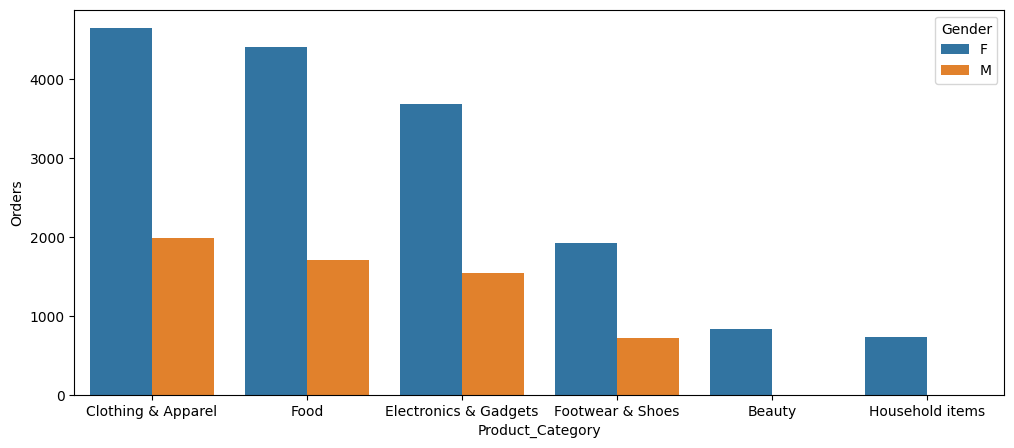

In [138]:
plt.figure(figsize=(12,5))
sns.barplot(data = group, x = "Product_Category", y = "Orders",hue = "Gender")

Female is ordering more cloths than male 

### summary

Based on the analysis, several key insights emerge:

1. Gender and Shopping Habits:
   - The number of females shopping exceeds males significantly. Specifically, 7,832 females compared to 3,407 males were observed.
   - Among females aged 25-36, 3,269 individuals were noted to be particularly active shoppers.

2. Regional Comparisons:
   - In Delhi, females spend more money on shopping, whereas in Punjab, females place more orders.
   - Overall, Uttar Pradesh leads in both the number of orders placed and the total amount spent on shopping.

3. Impact of Employment Sector:
   - Individuals working in the IT sector show a higher propensity for shopping compared to those in other sectors.

4. Spending Patterns by Gender:
   - Women tend to spend more on food items than on clothing and apparel.
   - However, clothing and apparel items are ordered more frequently.

5. Marital Status and Shopping Preferences:
   - Married women employed in the IT sector from Uttar Pradesh are notable for spending more on food items while purchasing a greater quantity of clothing and apparel.

These findings highlight distinct shopping behaviors influenced by gender, age, regional factors, employment sector, and marital status, offering valuable insights for targeted marketing and consumer engagement strategies.